## Aviakompaniya

 Amerika Qo'shma Shtatlaridagi parvozlarga nisbatan yo'lovchilarning fikri haqida ma'lumotlar berilgan. 
 Ushbu ma'lumotlardan foydalangan holda yo'lovchilarning qoniqishlarini bashorat qilish.

Tarkib:

Gender: yo'lovchilarning jinsi (ayol, erkak)

Customer Type: mijoz turi (sodiq mijoz, ishonchsiz mijoz)

Age: yo'lovchilarning haqiqiy yoshi

Type of Travel: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)

Class: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)

Flight distance: Ushbu sayohatning parvoz masofasi

Inflight wifi service: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)

Departure/Arrival time convenient: Ketish/Kelish vaqtining qoniqish darajasi

Ease of Online booking: Onlayn bron qilishdan qoniqish darajasi

Gate location: Darvoza joylashuvidan qoniqish darajasi

Food and drink: Oziq-ovqat va ichimlikdan qoniqish darajasi

Online boarding: Onlayn bortdan qoniqish darajasi

Seat comfort: O'rindiqning qulayligidan qoniqish darajasi

Inflight entertainment: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi

On-board service: Bort xizmatidan qoniqish darajasi

Leg room service: oyoq xonasi xizmatidan qoniqish darajasi

Baggage handling: bagajni tashishdan qoniqish darajasi

Check-in service: Ro'yxatdan o'tish xizmatidan qoniqish darajasi

Inflight service: Parvoz ichidagi xizmatdan qoniqish darajasi

Cleanliness: Tozalikdan qoniqish darajasi

Departure Delay in Minutes: jo‘nash vaqtida kechikish daqiqalari

Arrival Delay in Minutes: yetib kelganda kechikish daqiqalari

Satisfaction: Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, jaccard_score, accuracy_score, precision_recall_curve, recall_score

In [71]:
df = pd.read_csv("train_dataset.csv",index_col='id')
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


#### Datasetning o'lchami

In [72]:
df.shape

(10000, 23)

#### Datasetimizning ustunlarning type lari haqida ma'lumot

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


#### Datasetimizning raqamlari ustunlari haqida ma'lumot

In [74]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


#### Datasetimizning type object bo'lganlari haqida ma'lumolar

In [75]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class
count,10000,10000,10000,10000
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,5169,8307,7079,5048


In [76]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


#### Datasetimizning har ustunining taqsimoti (histogrammasi)

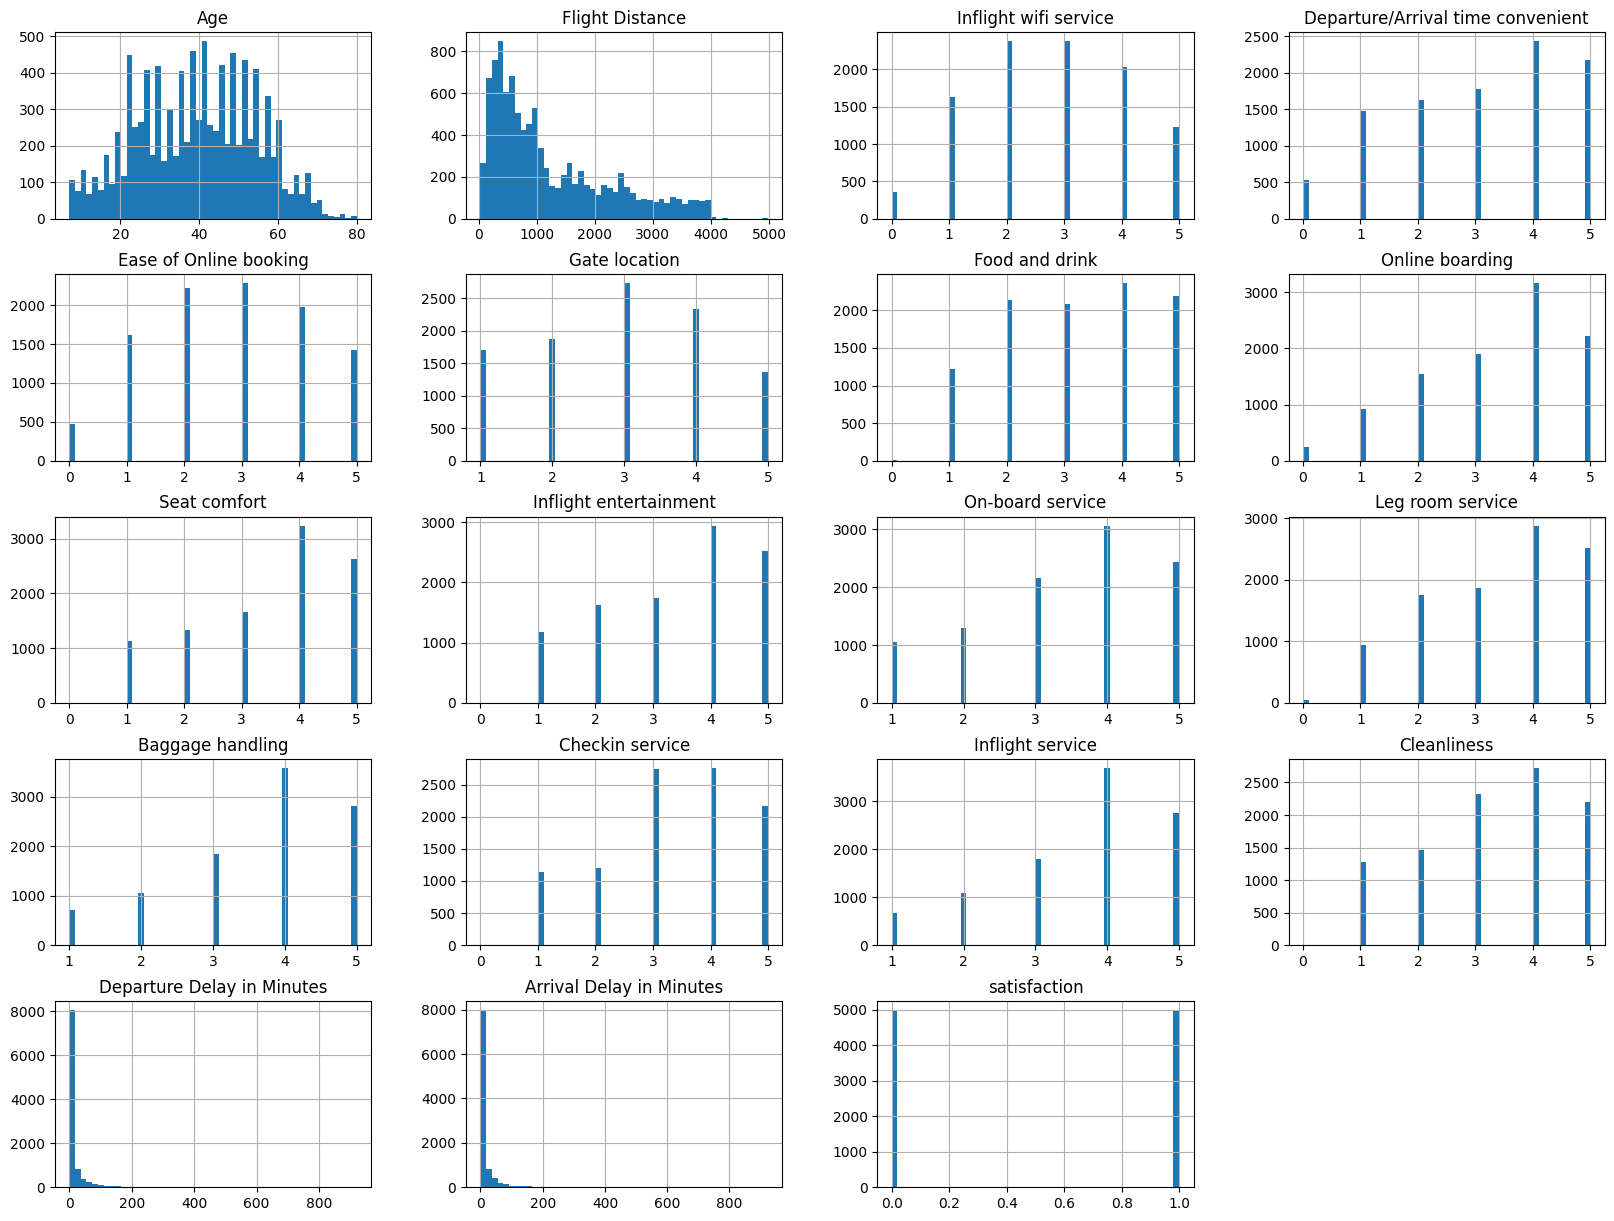

In [77]:
df.hist(bins=50,figsize=(20,15))
plt.show()

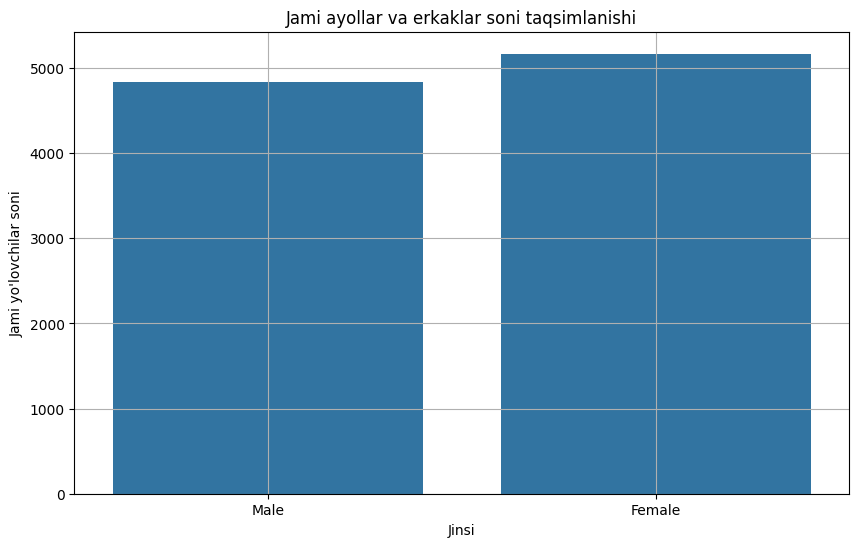

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title("Jami ayollar va erkaklar soni taqsimlanishi")
plt.xlabel("Jinsi")
plt.ylabel("Jami yo'lovchilar soni")
plt.grid()
plt.show()

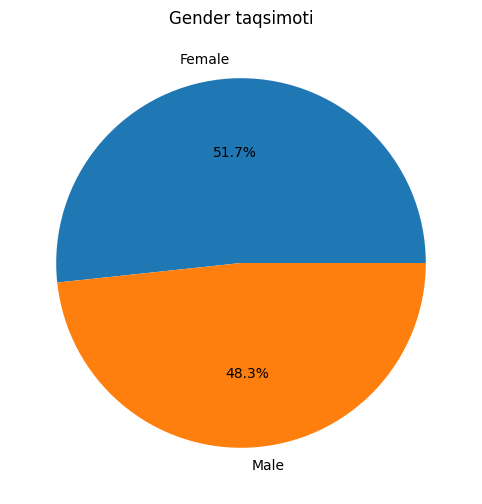

In [79]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender taqsimoti')
plt.show()

In [80]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [81]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       8307
disloyal Customer    1693
Name: count, dtype: int64

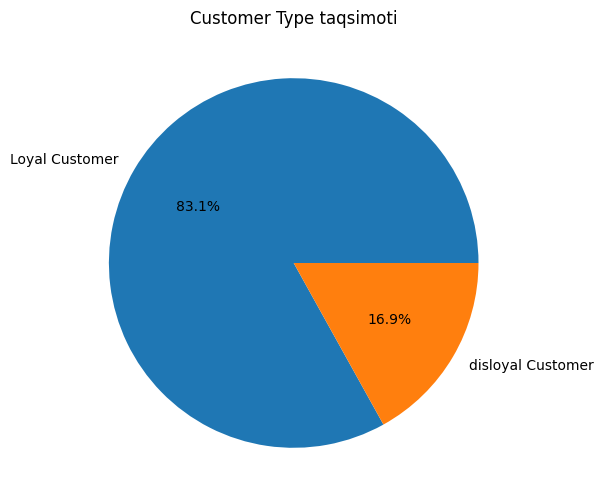

In [82]:
gender_counts = df['Customer Type'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Customer Type taqsimoti')
plt.show()

### Customer larning yoshining taroqoqlik grafigi

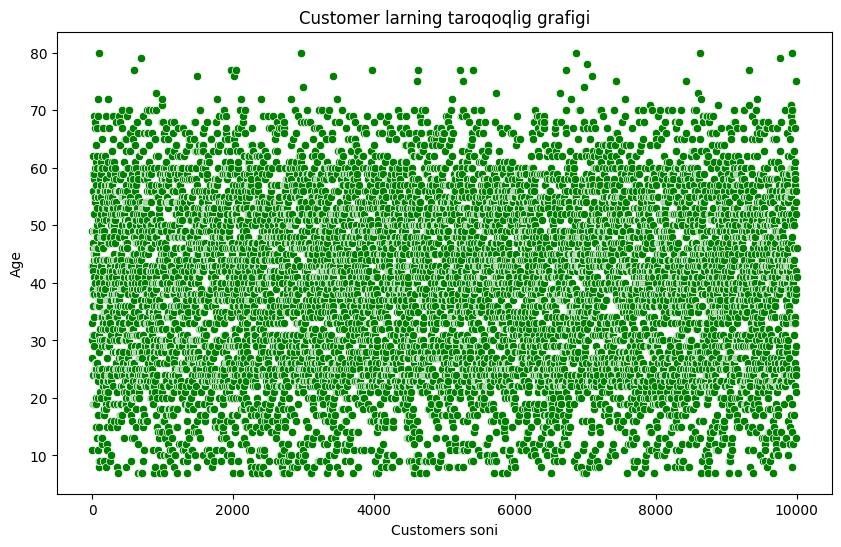

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df['Age'],c='green')
plt.title("Customer larning taroqoqlig grafigi")
plt.xlabel("Customers soni")
plt.show()

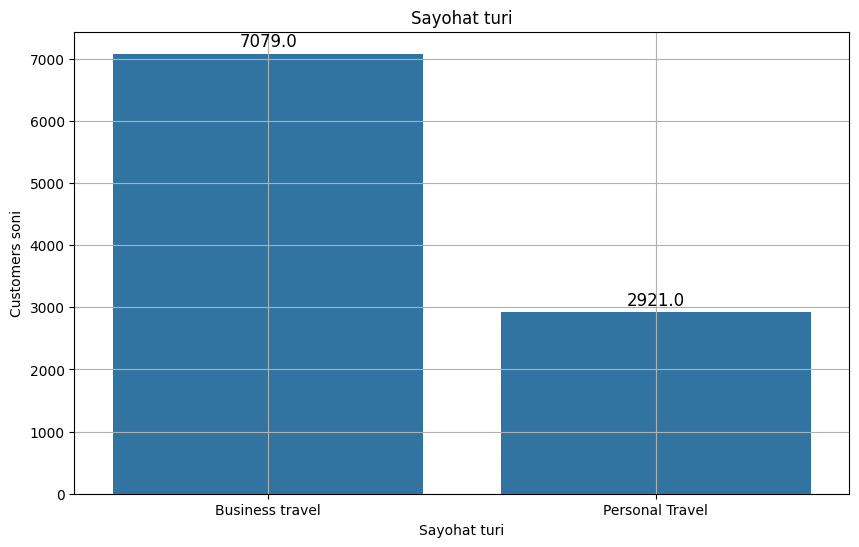

In [84]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Type of Travel')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title("Sayohat turi")
plt.ylabel("Customers soni")
plt.xlabel("Sayohat turi")
plt.grid(True)
plt.show()

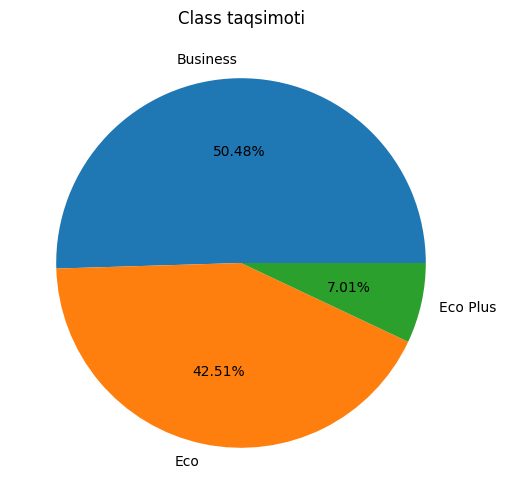

In [85]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(class_counts,labels=class_counts.index, autopct='%1.2f%%')
plt.title('Class taqsimoti')
plt.show()

In [86]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


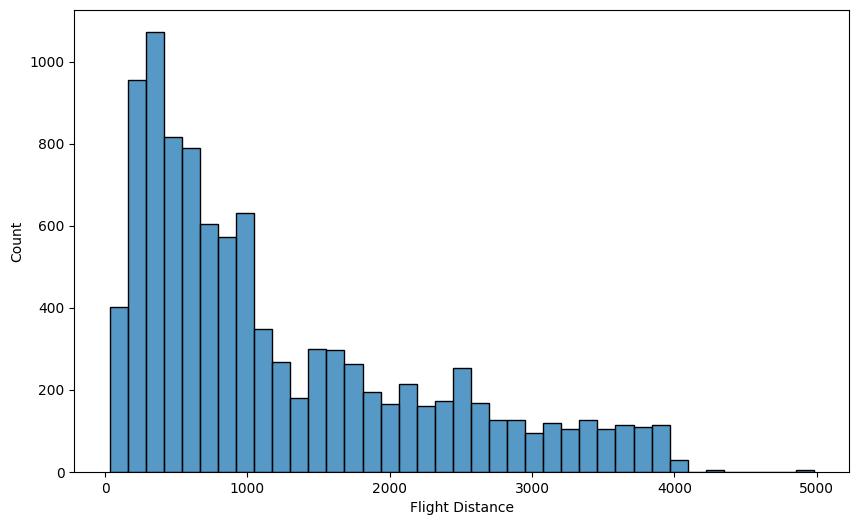

In [87]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Flight Distance'])
plt.show()

### Datasetda null qiymatlar bor yoki yo'q ekanligni tekshirish

In [88]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [89]:
df.isnull().sum()/len(df) * 100

Gender                               0.00
Customer Type                        0.00
Age                                  0.00
Type of Travel                       0.00
Class                                0.00
Flight Distance                      0.00
Inflight wifi service                0.00
Departure/Arrival time convenient    0.00
Ease of Online booking               0.00
Gate location                        0.00
Food and drink                       0.00
Online boarding                      0.00
Seat comfort                         0.00
Inflight entertainment               0.00
On-board service                     0.00
Leg room service                     0.00
Baggage handling                     0.00
Checkin service                      0.00
Inflight service                     0.00
Cleanliness                          0.00
Departure Delay in Minutes           0.00
Arrival Delay in Minutes             0.28
satisfaction                         0.00
dtype: float64

In [90]:
df.dropna(inplace=True)

In [91]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [92]:
df.shape

(9972, 23)

In [93]:
df.duplicated().sum()

486

In [96]:
df.drop_duplicates(inplace=True)

In [98]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,2,...,4,4,1,4,4,4,3,21,12.0,0
9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,3,...,4,4,4,4,3,4,3,37,38.0,1


In [115]:
df.corrwith(df['satisfaction']).sort_values(ascending=False).abs()

satisfaction                         1.000000
Online boarding                      0.502763
Inflight entertainment               0.401558
Seat comfort                         0.343642
Leg room service                     0.325264
On-board service                     0.324537
Cleanliness                          0.312169
Flight Distance                      0.301944
Inflight wifi service                0.279137
Baggage handling                     0.247467
Inflight service                     0.240536
Checkin service                      0.232788
Food and drink                       0.210437
Ease of Online booking               0.165137
Age                                  0.142886
Gate location                        0.009709
Gender                               0.001911
Departure Delay in Minutes           0.043405
Arrival Delay in Minutes             0.048312
Departure/Arrival time convenient    0.068787
Customer Type                        0.178927
Class                             

In [127]:
df.drop(columns=['Departure/Arrival time convenient','Arrival Delay in Minutes','Gender','Gate location'],inplace=True)

In [128]:
categorical_columns = ['Customer Type','Type of Travel','Class']

#### Categorical columnslarni sonlarga o'zgartirib olish

In [129]:
label = LabelEncoder()
for i in categorical_columns:
    df[i] = label.fit_transform(df[i])

In [130]:
df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,
1,1,0.356164,0,1,0.109047,0.4,0.4,0.8,0.4,0.8,0.8,0.50,0.2,0.5,0.8,0.50,0.8,0.010858,0.0
2,0,0.575342,0,0,0.282714,0.8,0.8,0.6,1.0,0.8,1.0,1.00,1.0,1.0,0.6,1.00,0.6,0.000000,1.0
3,0,0.493151,0,1,0.168821,0.2,0.8,0.8,0.8,0.6,0.2,0.00,0.2,0.0,0.2,0.00,0.4,0.000000,0.0
4,0,0.273973,0,0,0.306745,0.6,0.6,0.4,0.4,0.4,0.4,0.75,0.8,1.0,1.0,0.75,0.4,0.000000,1.0
5,0,0.054795,1,1,0.099960,0.6,0.6,0.8,0.6,0.8,0.8,1.00,0.4,1.0,0.6,1.00,0.8,0.000000,0.0


#### Ustunlarni qiymatlarni normalizatsiya qilib olish

In [131]:
scaler = MinMaxScaler()

columns = df.columns

for i in columns:
    column_data = df[i].values.reshape(-1, 1)
    
    scaled_data = scaler.fit_transform(column_data)
    
    df[i] = scaled_data.flatten()

In [132]:
df.head(10)

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,
1,1.0,0.356164,0.0,0.5,0.109047,0.4,0.4,0.8,0.4,0.8,0.8,0.50,0.2,0.50,0.8,0.50,0.8,0.010858,0.0
2,0.0,0.575342,0.0,0.0,0.282714,0.8,0.8,0.6,1.0,0.8,1.0,1.00,1.0,1.00,0.6,1.00,0.6,0.000000,1.0
3,0.0,0.493151,0.0,0.5,0.168821,0.2,0.8,0.8,0.8,0.6,0.2,0.00,0.2,0.00,0.2,0.00,0.4,0.000000,0.0
4,0.0,0.273973,0.0,0.0,0.306745,0.6,0.6,0.4,0.4,0.4,0.4,0.75,0.8,1.00,1.0,0.75,0.4,0.000000,1.0
5,0.0,0.054795,1.0,0.5,0.099960,0.6,0.6,0.8,0.6,0.8,0.8,1.00,0.4,1.00,0.6,1.00,0.8,0.000000,0.0
6,0.0,0.315068,1.0,1.0,0.202544,0.4,0.4,1.0,0.4,1.0,1.0,0.75,1.0,1.00,0.8,0.75,1.0,0.000000,0.0
7,0.0,0.424658,0.0,0.5,0.160541,1.0,0.2,1.0,1.0,1.0,1.0,0.00,0.8,0.75,1.0,0.75,1.0,0.002172,1.0
8,0.0,0.438356,0.0,1.0,0.026454,0.6,0.8,0.6,0.6,0.6,0.6,0.50,1.0,1.00,0.2,0.50,0.6,0.000000,1.0
9,1.0,0.493151,0.0,0.0,0.102989,0.4,0.4,0.6,0.4,0.6,0.6,1.00,0.4,1.00,0.8,0.75,0.6,0.000000,0.0


In [135]:
X = df.iloc[:,:-1]
X

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
id,,,,,,,,,,,,,,,,,,
1,1.0,0.356164,0.0,0.5,0.109047,0.4,0.4,0.8,0.4,0.8,0.8,0.50,0.2,0.50,0.8,0.50,0.8,0.010858
2,0.0,0.575342,0.0,0.0,0.282714,0.8,0.8,0.6,1.0,0.8,1.0,1.00,1.0,1.00,0.6,1.00,0.6,0.000000
3,0.0,0.493151,0.0,0.5,0.168821,0.2,0.8,0.8,0.8,0.6,0.2,0.00,0.2,0.00,0.2,0.00,0.4,0.000000
4,0.0,0.273973,0.0,0.0,0.306745,0.6,0.6,0.4,0.4,0.4,0.4,0.75,0.8,1.00,1.0,0.75,0.4,0.000000
5,0.0,0.054795,1.0,0.5,0.099960,0.6,0.6,0.8,0.6,0.8,0.8,1.00,0.4,1.00,0.6,1.00,0.8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.643836,1.0,0.5,0.209410,0.2,0.2,0.4,1.0,0.8,0.8,0.75,0.2,0.75,0.8,0.75,0.6,0.022801
9997,0.0,0.643836,0.0,1.0,0.276252,0.8,0.2,0.4,0.6,0.6,0.8,0.75,0.8,0.75,0.2,0.75,0.8,0.036916
9998,0.0,0.534247,0.0,0.0,0.284532,0.6,0.4,0.6,0.8,1.0,0.8,0.75,0.8,0.75,0.6,0.75,0.6,0.040174


In [137]:
y = df.iloc[:,-1]
y

id
1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
        ... 
9996     0.0
9997     0.0
9998     1.0
9999     1.0
10000    1.0
Name: satisfaction, Length: 9486, dtype: float64

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### KNN Classification

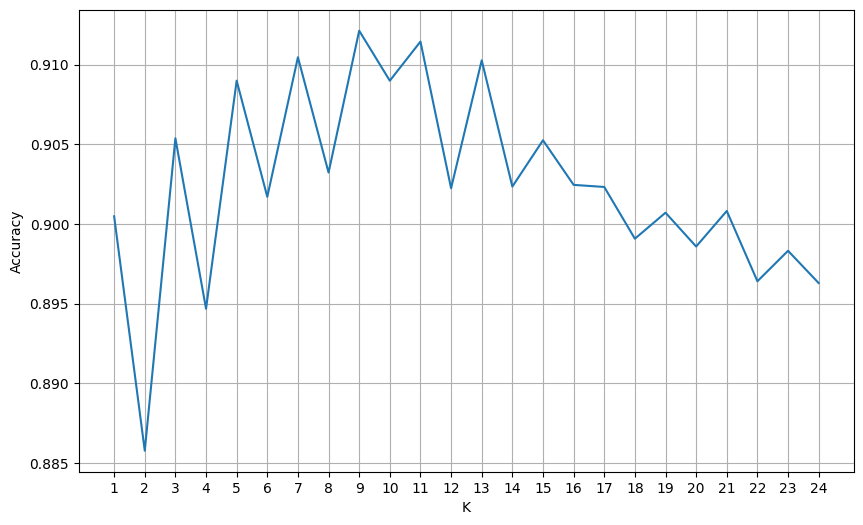

In [197]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [198]:
model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [199]:
y_pred_knn = model_knn.predict(X_test)

In [200]:
def accuracy(y_test,y_pred):
    print(f"accuracy_score: {accuracy_score(y_pred_knn,y_test)*100:.2f} %")
    print(f"f1_score: {f1_score(y_pred_knn,y_test)*100:.2f} %")
    print(f"Recall: {recall_score(y_pred_knn,y_test)*100:.2f} %")
    print(f"jaccard index: {jaccard_score(y_pred_knn,y_test)*100:.2f} %")

In [201]:
accuracy(y_test,y_pred_knn)

accuracy_score: 91.41 %
f1_score: 91.21 %
Recall: 95.38 %
jaccard index: 83.85 %


In [202]:
def confusion(y_test,y_pred):
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    plt.title("Chalkashlik matritsasi")
    plt.ylabel("Haqiqiy qiymatlar")
    plt.xlabel("Bashorat qiymatlar")
    plt.show()

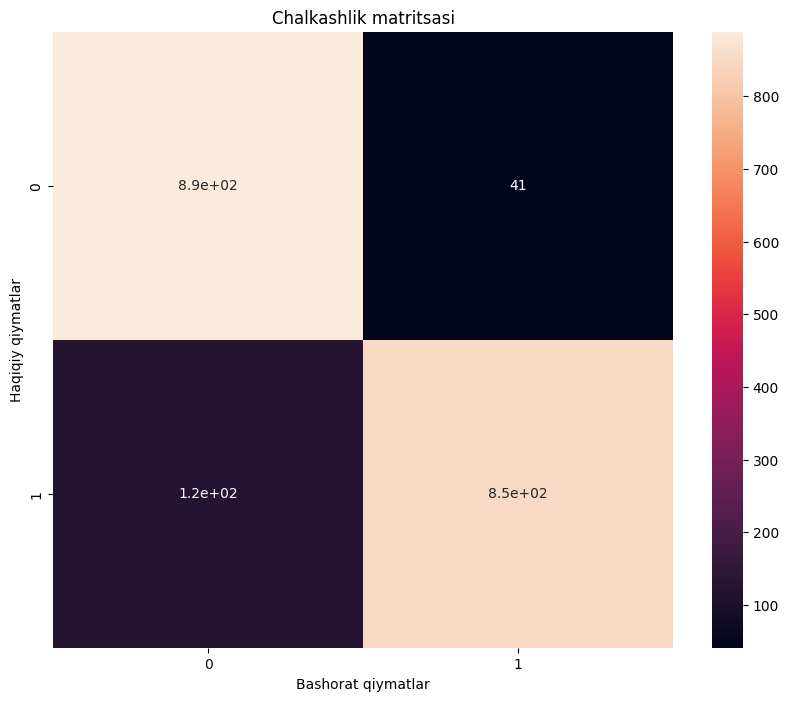

In [203]:
confusion(y_test,y_pred_knn)

### Random Forest Classification

In [204]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [205]:
y_pred_rf = model_rf.predict(X_test)

In [206]:
accuracy(y_test,y_pred_rf)

accuracy_score: 91.41 %
f1_score: 91.21 %
Recall: 95.38 %
jaccard index: 83.85 %


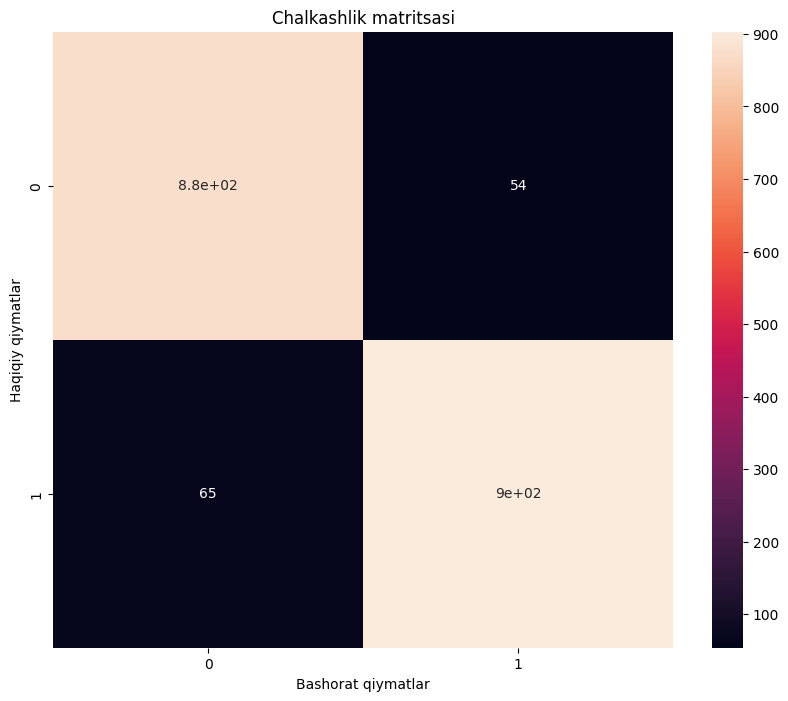

In [207]:
confusion(y_test,y_pred_rf)

### Decision Tree Classification

In [208]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [209]:
y_pred_dt = model_dt.predict(X_test)

In [210]:
accuracy(y_test,y_pred_dt)

accuracy_score: 91.41 %
f1_score: 91.21 %
Recall: 95.38 %
jaccard index: 83.85 %


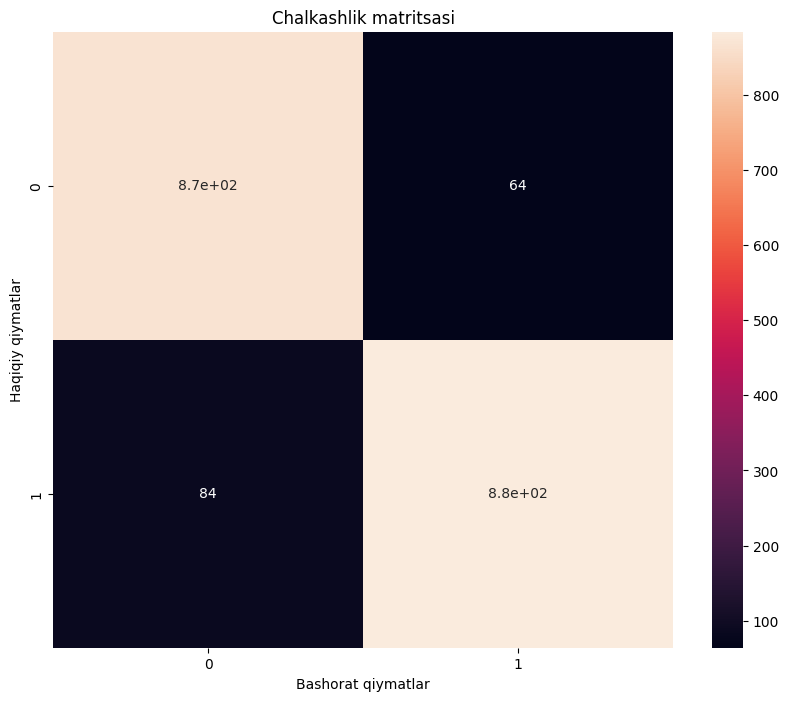

In [211]:
confusion(y_test,y_pred_dt)

In [212]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [213]:
y_pred_lr = model_lr.predict(X_test)

In [214]:
accuracy(y_test,y_pred_lr)

accuracy_score: 91.41 %
f1_score: 91.21 %
Recall: 95.38 %
jaccard index: 83.85 %


In [215]:
model_GNN = GaussianNB()
model_GNN.fit(X_train,y_train)

GaussianNB()

In [216]:
y_pred_gnn = model_GNN.predict(X_test)

In [217]:
accuracy(y_test,y_pred_gnn)

accuracy_score: 91.41 %
f1_score: 91.21 %
Recall: 95.38 %
jaccard index: 83.85 %


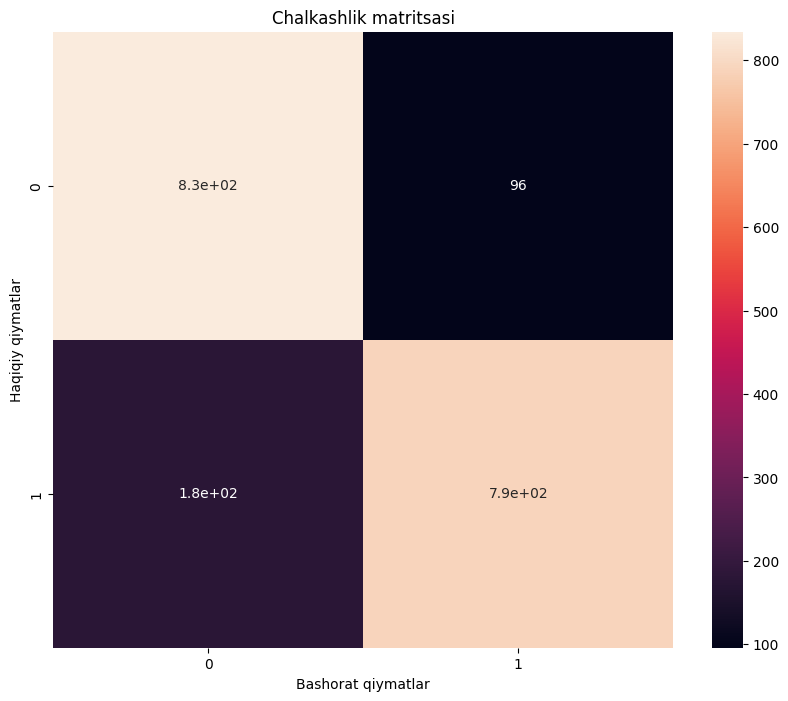

In [218]:
confusion(y_test,y_pred_gnn)

In [229]:
test_dataset = pd.read_csv("./test_dataset.csv",index_col='id')

In [230]:
test_dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0


In [231]:
test_dataset.drop(columns=['Departure/Arrival time convenient','Arrival Delay in Minutes','Gender','Gate location'],inplace=True)

In [232]:
categorical_columns = ['Customer Type','Type of Travel','Class']

In [233]:
label = LabelEncoder()
for i in categorical_columns:
    test_dataset[i] = label.fit_transform(test_dataset[i])

In [234]:
scaler = MinMaxScaler()

columns = test_dataset.columns

for i in columns:
    column_data = test_dataset[i].values.reshape(-1, 1)
    
    scaled_data = scaler.fit_transform(column_data)
    
    test_dataset[i] = scaled_data.flatten()

In [237]:
predictions = model_knn.predict(test_dataset)

In [238]:
predictions

array([0., 1., 1., ..., 0., 1., 0.])

In [239]:
test_data = pd.read_csv("./sample_submission.csv")

In [240]:
results = pd.DataFrame({'id': test_data['id'], 'satisfaction': predictions})
results.to_csv('predictions.csv', index=False)